# Linear Regression - Housing Dataset

In [1]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import seaborn as sns

In [39]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline 

In [15]:
train = pd.read_csv('house_prices_train.csv')

In [16]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [18]:
 train.describe() 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:xlabel='SalePrice'>

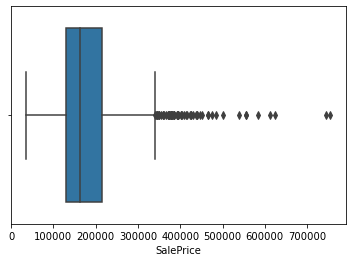

In [31]:
sns.boxplot(x=train['SalePrice'])

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

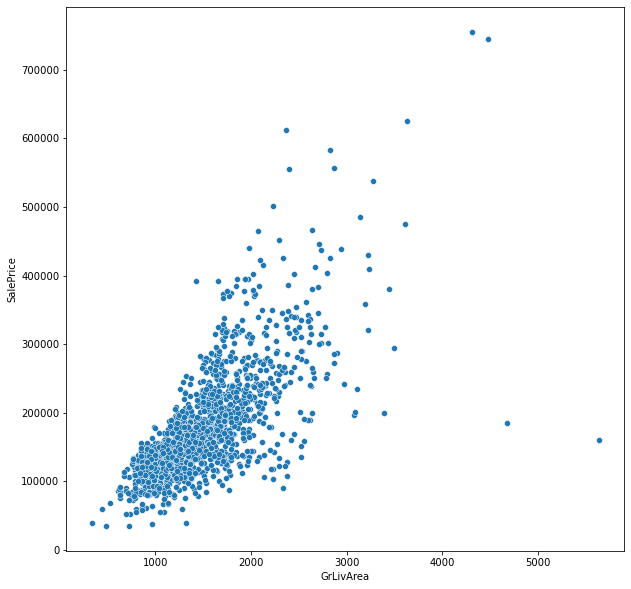

In [41]:
plt.figure(figsize=(10,10))
sns.scatterplot(y=train['SalePrice'],x=train['GrLivArea']) #scatter plot

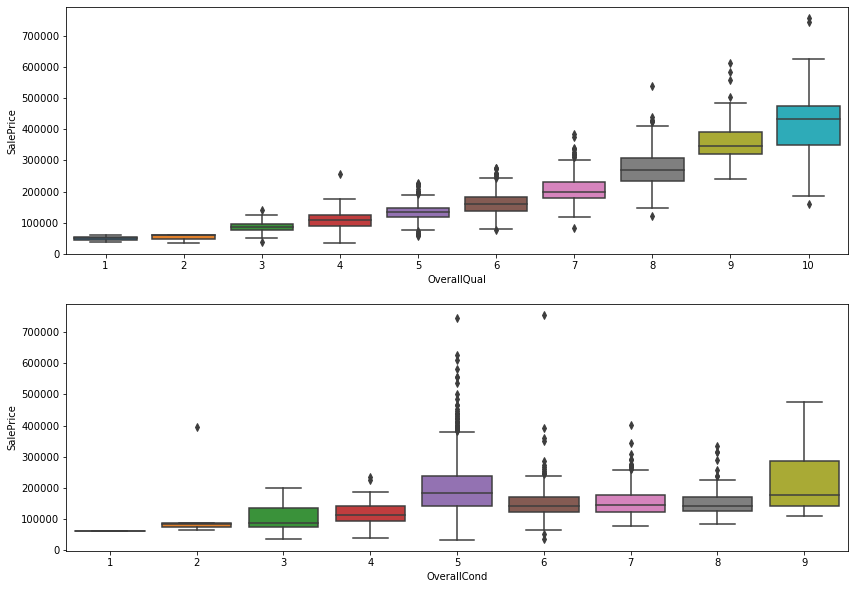

In [64]:
fig,alt= plt.subplots(nrows=2,figsize=(14,10))
sns.boxplot(ax = a[0],y=train['SalePrice'],x=train['OverallQual']) 
alt[1]= sns.boxplot(y=train['SalePrice'],x=train['OverallCond'])


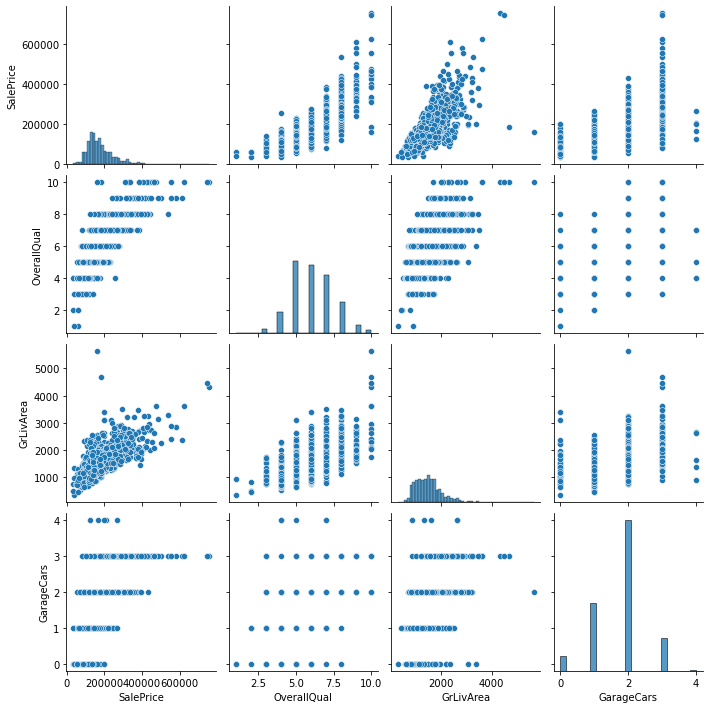

In [101]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars']
sns.pairplot(train[cols]);

In [124]:
t =train.isnull().sum().sort_values(ascending=False) 

In [125]:
pd.reset_option("max_rows", None) #a very nice thing https://towardsdatascience.com/how-to-show-all-columns-rows-of-a-pandas-dataframe-c49d4507fcf

In [126]:
t

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [140]:
x = train['GrLivArea']

In [141]:
x


0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1460, dtype: int64

In [142]:
y = train['SalePrice']

In [143]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [144]:
#Feature Scaling
x = (x - x.mean()) / x.std()


In [145]:
x

0       0.370207
1      -0.482347
2       0.514836
3       0.383528
4       1.298881
          ...   
1455    0.250316
1456    1.061003
1457    1.569110
1458   -0.832502
1459   -0.493765
Name: GrLivArea, Length: 1460, dtype: float64

In [150]:
x_vector = np.c_[np.ones(x.shape[0]), x] 

In [151]:
x_vector

array([[ 1.        ,  0.37020659],
       [ 1.        , -0.48234664],
       [ 1.        ,  0.51483616],
       ...,
       [ 1.        ,  1.56910958],
       [ 1.        , -0.83250243],
       [ 1.        , -0.49376477]])

In [153]:
x_vector.shape

(1460, 2)

Making the cost function J(theta)

In [170]:
x_vector

array([[ 1.        ,  0.37020659],
       [ 1.        , -0.48234664],
       [ 1.        ,  0.51483616],
       ...,
       [ 1.        ,  1.56910958],
       [ 1.        , -0.83250243],
       [ 1.        , -0.49376477]])

In [169]:
x_vector

array([[ 1.        ,  0.37020659],
       [ 1.        , -0.48234664],
       [ 1.        ,  0.51483616],
       ...,
       [ 1.        ,  1.56910958],
       [ 1.        , -0.83250243],
       [ 1.        , -0.49376477]])

In [171]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [172]:
#calcluting cost

In [373]:
def cost(X,y,theta):
    n = len(y)
    M = X.dot(theta) 
    sq_error = (M - y)**2
    
    return 1/(2*n) * sq_error.sum()

In [79]:
def gradient_descent (X,y,theta,learn_rate=0.01,iteration = 1000): 
    m = len(y) 
    cost_history = np.zeros(iteration) 
    theta_history = np.zeros((iteration,X.shape[1])) 
    for i in range(iteration):
        
        h = X.dot(theta) 
        theta = theta - (1/m)*learn_rate*X.T.dot(h-y) 
        theta_history[i,:] = theta.T 
        cost_history[i] = cost(X,y,theta) 
    return theta, cost_history, theta_history
        

In [109]:
theta = np.random.randn(x.shape[1],1)

In [110]:
theta

array([[-0.66122375],
       [ 0.0345893 ],
       [ 1.60467016],
       [ 0.81361804]])

In [111]:
x_vector

array([[ 1.        ,  0.6512561 ,  0.37020659,  0.31161787],
       [ 1.        , -0.07181151, -0.48234664,  0.31161787],
       [ 1.        ,  0.6512561 ,  0.51483616,  0.31161787],
       ...,
       [ 1.        ,  0.6512561 ,  1.56910958, -1.02650593],
       [ 1.        , -0.79487911, -0.83250243, -1.02650593],
       [ 1.        , -0.79487911, -0.49376477, -1.02650593]])

In [112]:
t = np.array(y).reshape(len(y),1)

In [113]:
t

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]])

In [114]:
theta, cost_history, theta_history = gradient_descent(x,t,theta,learn_rate=0.01,iteration=2000)

In [115]:
theta


array([[180921.19555322],
       [ 37478.60364086],
       [ 26631.93863167],
       [ 15921.22614698]])

In [108]:
cost_history[-1]

822817042.7398278

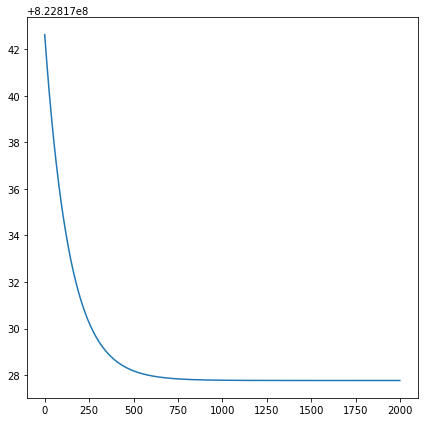

In [100]:
plt.figure(figsize=(7,7))
plt.plot(cost_history)

In [389]:
x = train[['OverallQual', 'GrLivArea', 'GarageCars']]

x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x] 

In [391]:
x.shape


(1460, 4)

In [394]:
theta, cost_history, theta_history = gradient_descent(x,t,theta,learn_rate=0.01,iteration=2000)

In [395]:
theta

array([[180921.19555322],
       [ 37478.604254  ],
       [ 26631.93830568],
       [ 15921.22581327]])

In [396]:
cost_history[-1]

822817042.7360756

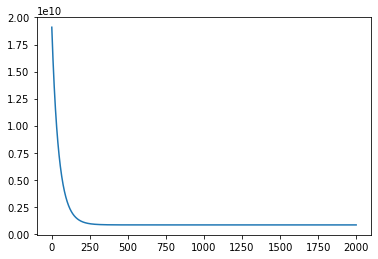

In [397]:
plt.plot(cost_history)

In [77]:
x

array([[ 1.        ,  0.6512561 ,  0.37020659,  0.31161787],
       [ 1.        , -0.07181151, -0.48234664,  0.31161787],
       [ 1.        ,  0.6512561 ,  0.51483616,  0.31161787],
       ...,
       [ 1.        ,  0.6512561 ,  1.56910958, -1.02650593],
       [ 1.        , -0.79487911, -0.83250243, -1.02650593],
       [ 1.        , -0.79487911, -0.49376477, -1.02650593]])